# Homework 02

### Brown University  
### DATA 1010  
### Fall 2020

In [1]:
using Plots, Images, ImageMagick, CSV, LinearAlgebra
default(legend = false)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278


## Problem 1

The **rank** of a matrix is defined to be the dimension of the span of its columns. 

(a) Show that the rank of $\mathbf{u} \mathbf{v}'$ is equal to 1, if $\mathbf{u}$ and $\mathbf{v}$ are any (column) vectors. 

By the definition of matrix multiplication, every column of $\mathbf{u} \mathbf{v}'$ is a multiple of the same vector (namely, $\mathbf{u}$). Therefore, its rank is 1.

(b) Identify some countries whose flags are rank-1 matrices (where the correspondence between flags and matrices is to associate a flag image with a matrix of pixel values). You can have a look at various flags in the `flags` directory 

. 
The first one is `am.png`, and the second is `be.png`. We can recognize especially easily that these are rank-1 matrices, since the columns are all the same (for `am`) and the rows are all the same for `be`. For that second example we're using the fact that row rank equals column rank.

┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1278


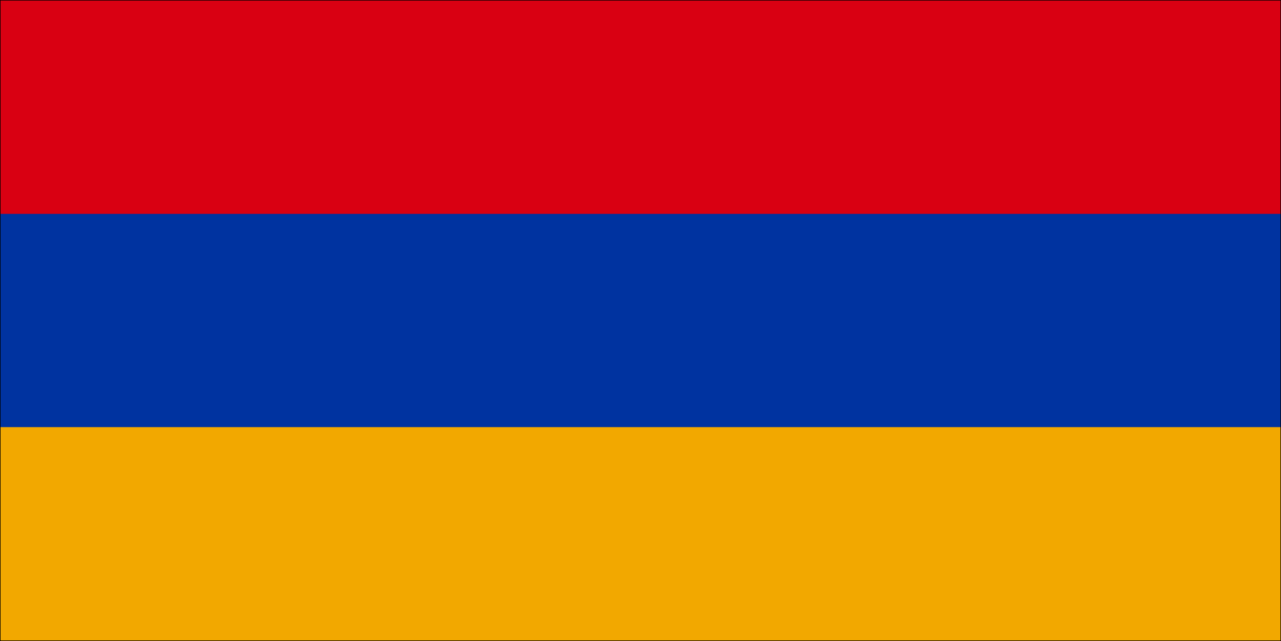

In [2]:
ImageMagick.load("flags/am.png")

(c) Run the code below several times to see a handful of rank-1 matrix heatmaps. Describe qualitatively what random rank-1 matrices look like.

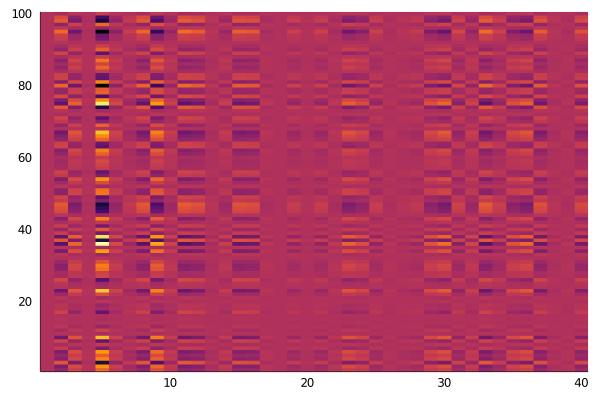

In [3]:
heatmap(randn(100) * randn(40)')

They have a "plaid" appearance, with lots of "blockish" structure. 

(d) Does the matrix $A$ defined below look like a rank-1 matrix? Is it a rank-1 matrix?

In [4]:
A = randn(100) * randn(40)' + 0.001*randn(100, 40);

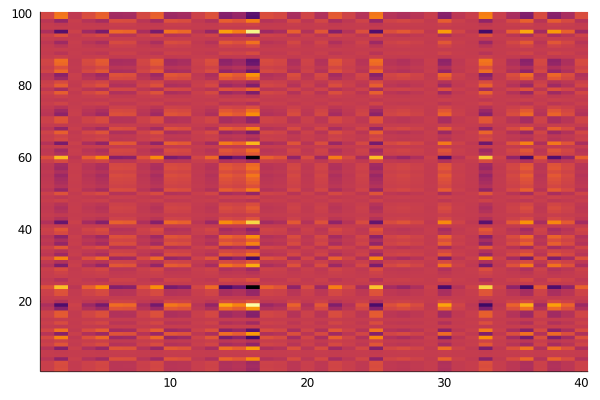

In [5]:
heatmap(A)

Certainly it looks rank-1, since it's constructed in a way that makes it imperceptibly different from a rank-1 matrix. 

(e) Suppose we just had the matrix $A$, but not the expression that was used to generate it. How could we recover the information that this matrix is very close to a rank-1 matrix?

The key idea here is the *singular value decomposition*. The SVD allows us to look at rank in a quantitative way, not only identifying dimensions that are *completely* squished out by the corresponding linear transformation, but also identifying dimensions that are *almostly* competely squished out.

And sure enough, one of the singular values of $A$ is substantial, and all the rest are much, much smaller:

In [6]:
svdvals(A)[1:5]

5-element Array{Float64,1}:
 52.04934846365891
  0.01601000315729726
  0.015164916515937724
  0.014646742053304032
  0.014176223123159784

(f) What is the distribution of country flag image ranks? For consistency, we divide each rank value by the height of the matrix (the first dimension). Make a histogram of the resulting ratios. Which flag elements lead to an especially high rank?

In [7]:
"""
Compute the rank of the flag of the country with code `countrycode`, interpreting 
each RGB triple as a 3×1 matrix block.
"""
function flagrankratio(countrycode)
    img = RGBA{Normed{UInt8,8}}.(ImageMagick.load("flags/$(countrycode).png"))
    height, width = size(channelview(img))[2:3]
    rank(reshape(channelview(img), (4 * height, width))) / size(img, 1)
end

flagrankratio

In [ ]:
countrycode(file) = split(file, ".")[1]
all_ratios = [flagrankratio(countrycode(file)) for file in readdir("flags") if endswith(file, ".png")]

In [ ]:
histogram(all_ratios)

## Problem 2

Show that if $\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$ is linearly
independent and
$\{\mathbf{v}_1 + \mathbf{w}, \mathbf{v}_2 \ldots, \mathbf{v}_n\}$ is
linearly dependent, then $\mathbf{w}$ is in the span of
$\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$.

**Solution**.  If
  $\{\mathbf{v}_1 + \mathbf{w}, \mathbf{v}_2 \ldots, \mathbf{v}_n\}$
  is linearly dependent, then there exists a nontrivial linear
  combination of these vectors which is equal to the zero vector, say
  $$
    c_1(\mathbf{v}_1 + \mathbf{w}) + c_2 \mathbf{v}_2 + \cdots + c_n
    \mathbf{v}_n = \boldsymbol{0}. 
  $$
  If $c_1$ were zero in this equation, then there would be a
  nontrivial vanishing linear combination of the vectors
  $\mathbf{v}_2, \ldots, \mathbf{v}_n$, which isn't possible since we
  know those vectors are linearly independent. Therefore, we can solve
  for $\mathbf{w}$ to get
  $$
    \mathbf{w} = -\frac{c_1\mathbf{v}_1 + \cdots + c_n
      \mathbf{v}_n}{c_1}. 
  $$
  Therefore, $\mathbf{w}$ is in the span of
  $\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$. 

## Problem 3

Suppose that $A$ is a square matrix each of whose rows has the same sum $s$. Show that $s$ is an eigenvalue of $A$. Hint: don't use determinants; leverage the constant row sum to search for an eigenvector directly. 

Note: as an example, the matrix 
$$
A = \left[ \begin{array}{ccc} 
2 & -2 & 4 \\
1 & 1 & 2 \\
0 & 3 & 1
\end{array}\right] 
$$
has a constant row sum of 4. 

By the definition of matrix multiplication, the vector of ones is an eigenvector with eigenvalue $s$. 

## Problem 4

Consider the function $f(x,y) = xe^{-x^2 + y} + \log\left(\frac{x}{1+ y}\right)$. 

(a) Find $\nabla f$.

(b) Numerically identify $f$'s direction of maximum increase at the point $(1,0)$ by evaluating $f([1,0] + \epsilon[\cos(\theta), \sin(\theta)])$ for some small value of $\epsilon$ for many equally-spaced $\theta$ values in the range $[0, 2\pi)$ and identifying the ones that produce the largest and smallest output values. 

Hints: You want to make a plot showing the relationship between $\theta$ and the resulting value output by the function. Comment on the shape of the resulting graph; is the shape universal or idiosyncratic to this function? You also want to also investigate a few values of $\epsilon$, to eludicate its role in the problem.

(c) Discuss the relationship between parts (a) and (b).

*Solution*. Let's begin by defining the function. We'll use multiple dispatch to do that in a tidy way for both pairs of arguments and for vectors containing a pair of arguments: 

In [ ]:
f(x,y) = x * exp(-x^2 + y) + log(x/(1+y))
f(v) = f(v[1], v[2])

f (generic function with 2 methods)

We're just going to use SymPy to evaluate the derivative: 

In [ ]:
using SymPy
@vars x y 
∇f = [diff(f(x,y), x), diff(f(x,y), y)]

2-element Array{Sym,1}:
 -2*x^2*exp(-x^2 + y) + exp(-x^2 + y) + 1/x
                x*exp(-x^2 + y) - 1/(y + 1)

At the point $(1,0)$, this evaluates to:

In [ ]:
subs.(∇f, x => 1, y => 0)

2-element Array{Sym,1}:
  1 - exp(-1)
 -1 + exp(-1)

Now, let's take a look at the direction in which $f$ increases most rapidly at that point. We'll just look at the function's values at every point on a circle around $(1,0)$: 

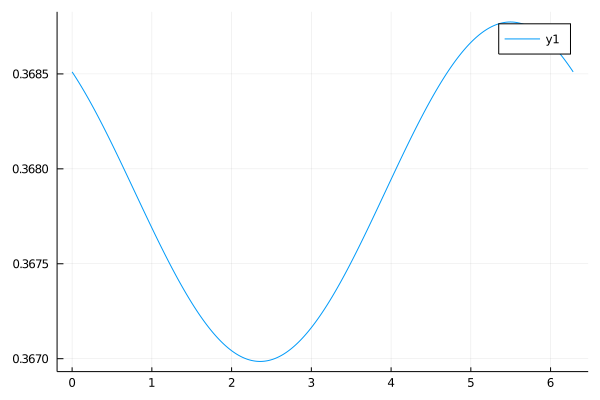

In [ ]:
ϵ = 0.001
θs = LinRange(0, 2π, 1000);
plot(θs, θ -> f([1,0] + ϵ*[cos(θ), sin(θ)]))

We can find the largest value (approximately) by just searching the list of output values: 

In [ ]:
θmax = θs[findmax([f([1,0] + ϵ*[cos(θ), sin(θ)]) for θ in θs])[2]]

5.497000959434393

From multivariable calculus, we know that the direction of maximum increase should be the direction of the gradient. To see that this checks out, we use the inverse tangent function to find the angle corresponding to the gradient we computed symbolically above:

In [ ]:
θmax - atan((exp(-1) - 1 )/(1 - exp(-1)))

6.282399122831841

That does indeed look like (approximately) a multiple of $2\pi$. 

## Problem 5

*In this problem, we will explore an important multivariable calculus idea which was not emphasized in the multivariable calculus review day.*

The map below was obtained by placing one dot at the residence of each person in the contiguous United States in the 2010 US Census (with color indicating race identification) and then representing each of many small squares in a grid with the average of the colors of the dots in the square. 

![map.png](map.png)

Suppose you're given the $764 \times 1366$ matrix which represent how darkly colored in each little square is (see the figure to the right for a small piece of this grid). These numbers are roughly proportional to the number of people living in each square. Here's a zoomed-in view of this matrix:

![colorgrid.png](colorgrid.png)

Using these data, approximate the population-weighted center of mass of the contiguous United States. Feel free to answer in terms of the matrix dimensions (e.g., how many pixels down and how many to the right of the top left corner of the matrix).

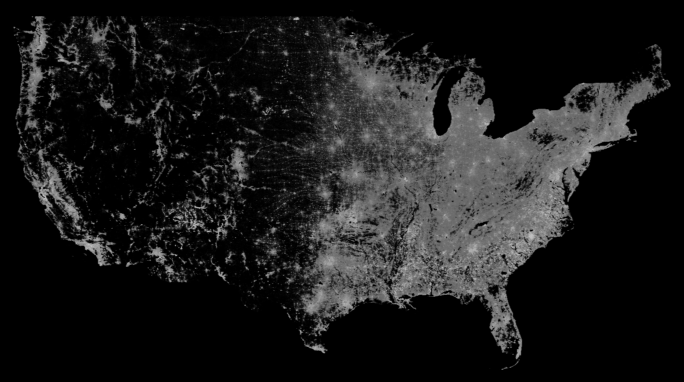

In [8]:
pixeldensities = Matrix(CSV.read("US_Matrix.csv"))
Gray.(pixeldensities)

The main idea for finding a center of mass is to compute a density-weighted integral of $x$ over the region of interest (to find the $x$-coordinate), and the same for $y$. Given that our data is already discrete (having been supplied using pixels), we should just do an approximating sum. The second-coordinate center of mass works out to: 

In [9]:
xcenter = sum(k * pixeldensities[j,k]
                for j in 1:size(pixeldensities, 1), 
                    k in 1:size(pixeldensities, 2))/sum(pixeldensities)

772.4303338084652

And the first coordinate: 

In [10]:
ycenter = sum(j * pixeldensities[j,k]
                for j in 1:size(pixeldensities, 1), 
                    k in 1:size(pixeldensities, 2))/sum(pixeldensities)

359.5156757258745

Let's modify the image to check that this makes sense: 

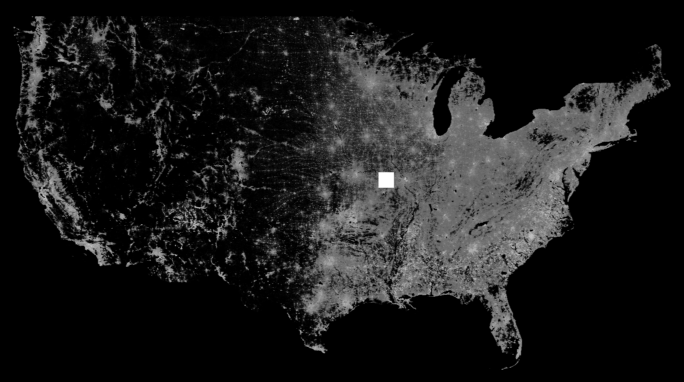

In [11]:
w = 15
i = round(Int, ycenter)
j = round(Int, xcenter)
pixeldensities[i - w : i + w, j - w : j + w] .= 1
Gray.(pixeldensities)

That does indeed seem reasonable. 